# Linear Models - a statistical Swiss Army Knife

## In this section

In this section we will learn:

- How variants of the familiar equation for a line (y = mx + b) underlie many different statistical models that you may have learned under different names.
- Adding an error term to the equation (y = mx + b + e) allows us to incorporate measurement error into our prediction 
- Why error terms are often assumed to follow a normal (bell-curve) distribution
- How expanding the equation for a line lets us handle multiple predictor variables 
- How categories (like 'red' vs 'blue' or 'country') can be represented or encoded as 'dummy variables' with 0's and 1's, thereby allowing them to be incorporate categorical data as predictors in the equation for a line.

## Prerequisites

## Table of Content

## Lining it all up - Linear Models, Linear Regression and the Equation for a Line

While statistics is incredibly diverse, and can be extremely complex, many statistical methods can be thought of as variations on a simple equation that you have no doubt already been introduced to: the equation for a line `y = mx + b`. 

In this section, we will discuss many of the statistical tests commonly taught in introductory statistics courses, and show how despite having unique names and histories, many common statistical tests, —ranging from T-tests to ANOVA —  can be seen as rooted in the equation for a line.



In the equation for a line, we predict some variable `y` based on a predictor variable `x` times a slope `m`, offset by an added constant or intercept `b`. The steeper the slope `m`, the greater the effect of changes in our independent variable `x` on `y`. The bigger the intercept, the more the line is shifted upwards.

#### A 'perfect' prediction
Imagine you were predicting something real using such a line. For example, imagine that you were trying to estimate the amount of DNA that had been replicated by a DNA polymerase during cell division in a bacterium like *Escherichia coli*. 

You might reasonably predict — in the absence of contrary evidence — that this replication would occur at a fixed rate over time (rather than e.g. increasing exponentially over time or speeding up initially and then slowing down later). If that were right, and if you knew the starting amount of DNA in a cell, and the rate of DNA replication, you could use the equation for a line to predict the amount of DNA that you should expect in a cell after DNA replication had gone on for a certain amount of time. 

Your equation might look something like this: `dna_replicated = rate_of_dna_replication * time`+ `starting_dna`.

If you plotted the predictions of your equation onto a line plot (letting the `x`-axis represent time and `y`-axis represent the amount of DNA, you might get something like this:

<img src="./resources/line_plot.png" width="400"  description="A cartoon of a line plot with x and y axes. A black regression line runs diagonally up and to the left. ">


### A simple linear model in python

In statistics, we would refer to this as a simple *linear model* for the amount of dna replicated over time.

>**Simple Linear Models** use the equation for a line to predict a response variable based on a constant response to a predictor variable. 

We can build a simple linear model in python using one function (`linear_simulation`, below) to predict y-values corresponding to some x values using the equation for a line.

We can then plot this simple linear model using a `matplotlib` scatterplot.

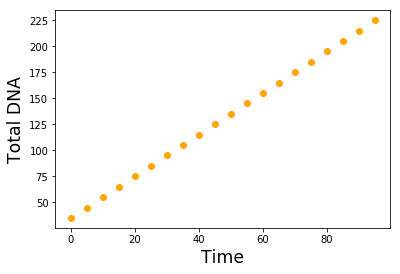

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

def linear_simulation(x_data,slope,intercept = 0):
    """Return y data given x data and parameters
    x_data -- a list of x data points (ints or floats)
    slope -- the slope of our linear model (m in y=mx+b+error)
    intercept -- the intercept of our linear model (b in y=mx+b+error)
    """
    y_predictions = []
    for i,x in enumerate(x_data):
        y = slope*x + intercept 
        y_predictions.append(y)
        
    return y_predictions


def plot_scatterplot(x,y,xlabel="x",ylabel="y"):
    """Plot a simple scatterplot of x vs. y"""
    plt.plot(x,y,"o",color = "orange")        
    plt.xlabel(xlabel,size = "xx-large")
    plt.ylabel(ylabel,size = "xx-large")

#set some x data (0-100 in steps of 5)
x_data = list(range(0,100,5))    

#calculate y data for our x data
y_data = linear_simulation(x_data = x_data,slope = 2.0,intercept =35.0)

#plot the result
plot_scatterplot(x_data,y_data,xlabel = "Time",ylabel = "Total DNA")

### Inferring linear models from data

Of course, in real life we often don't know the right slope or intercept for a biological process like DNA replication – we have to infer them from the data.

If we are instead inferring the slope and intercept of our line from the data, that is called **linear regression**. If you've ever added a regression line to a scatterplot in Excel, you have encountered linear regression.

Several variants of linear regression are commonly used in statistics, including those that have more than one `x` predictor variable (a **multiple linear model**), and those that have more than one response `y` variable (a **multivariate** linear model). We'll talk more about multiple linear models down below.

Central to the idea of linear regression is the notion of error. So let's talk about measurement errors, building on our simple example.

### Virtually all real measurements involve some amount of error

Let's say that you had a theoretical estimate for the `rate of replication` and amount of `starting_dna` in your cells, but you weren't totally sure if it was right. You want to compare that estimate against measurents of the *actual* rate of DNA replication over time, to see if the estimate is reasonable.

You might set up an experiment using either culture based experiments — in which many bacteria are grown together in a flask or on a plate — or single-cell experiments — in which individual cells are studied using sophisticated instruments — to collect data on the amount of DNA in cells at different points in time. Let's say this all worked and you got some data back.

*If* DNA replication was indeed happening at a linear rate, and *if* the rate of replication you estimated in that experiment were correct, then after you got your measurements back, do you think the points would fall precisely on the line predicted by the equation?

Of course not! If your experimental setup, instrumentation, and execution were outstanding, then they might fall *extremely close* to the line predicted by your equation. But they would not fall right on the line with perfect mathematical precision. Instead, if we plotted time on the x-axis and the amount of DNA replicated on the y-axis, they might look something like the diagram below:

<img src="./resources/linear_scatter_high_r2_linear_regression.png" width="400"  description="A cartoon of a scatter plot with x and y axes. A series of orange points is plotted. The points have some scatter to them, but roughly form a diagonal line from the lower left to the upper right of the plot. A black regression line runs diagonally through the points. ">

The process of measuring the rate of replication will inevitably be at least somewhat noisy, due to a variety of causes that might include:

- imprecisions of the instruments used to measure DNA replication
- imprecisions in when all the cells began replicating
- imprecisions in when each culture was measured
- etc

These types of imprecisions in measurement together constitute the amount of "error" that separates the *measured* number from our prediction if our model is in fact 100% correct.  The word "error" can sound a little scary, but some amount of error is virtually inevitable in any measurement. Small errors may be quite harmless, while larger errors may make it look like the data do not fit our linear estimate (even if they do). 

Even if our model is 100% correct, the presence of measurement error will inevitably mean our actual results are at best slightly blurred versions of that biological truth. Our job is not to pretend that measurement error doesn't exist, but rather to quantify it as best we can. In real situations, we will often need to decide whether differences between what a given model predicts and what we observe are likely to be due to measurement error, or if the data contradict the model.  

**Try it out**: try rerunning the code several times without changing any parameters. Does the shape of the distribution change, or stay exactly the same?

**Try it out**: try increasing the `scale` parameter, how does the shape of the normal distibution change? Do you think a higher `scale` parameter corresponds to more observation error or less?

### Residuals can be used to quantify error

The image below shows one way to start thinking about how we could estimate error. The grey lines show how different the y-value for each observation (orange point) is from the y-value we predicted using our simple linear model (black line). 

<img src="./resources/linear_scatter_high_r2_linear_regression_residuals.png" width="400"  description="A cartoon of a scatter plot with x and y axes, with orange points and a black regression line just as in the previous figure. Now, however, thin grey lines stretch vertically from each point to the regression line. These are the residuals — the difference between what the regression model predicts and the actual observed data. ">

These differences are known as the 'residuals', short for 'residual variation' in our `y` values, after accounting for the variation in `y` values predicted by our model.

<img src="./resources/labelled_residuals.png" width="400"  description="A cartoon of a scatter plot with x and y axes, with orange points and a black regression line just as in the previous figure. Now, however, thin grey lines stretch vertically from each point to the regression line. These are the residuals — the difference between what the regression model predicts and the actual observed data.">

> **Residuals** measure the difference between model predictions and observations. They represent *residual* variation that isn't explained by the model, but might be explained by other factors not included in the model.

If we wanted to simulate this whole process, and incorporate error into our simple linear model, we might write an equation that looks like this:

y = mx + b + e

The `e` parameter would not be a fixed value across the whole dataset, but rather represent the random error in each *individual* measurement. Those random errors  might be either positive or negative. Adding error to each y value will cause data points to fall either above or below the line representing the predictions of our model. 

If we wanted to polish this up to make this look a bit more 'mathy' — that is, to use conventions similar to those used in slightly more complex models — we could represent all the parameters of the model itself as &beta;s, and that funky observation-specific error term as &epsilon;. This would produce an equation that looks like the one below:

y = &beta;<sub>0</sub>x<sub>0</sub> + &beta;<sub>1</sub> + &epsilon;

This is often rearranged so the constant goes first:

y = &beta;<sub>0</sub> + &beta;<sub>1</sub>x<sub>1</sub>  + &epsilon;

In this equation &beta;<sub>0</sub> is the intercept, and &beta;<sub>1</sub> is the coefficient or slope saying how `y` changes with increasing values of x<sub>1</sub>.

A final way you will see simple linear models represented in programming languages like `R` or in the `patsy` python module is in a shorthand that removes the &beta; coefficients (slopes) for each term, and leaves the error term implicit: 

`y ~ 1 + x`

This notation can be a little confusing at first, but is very quick to write. Note that if we multiply each term by it's own beta, and add on the implicit error term, the shorthand notation `y ~ 1 + x`  becomes y ~ &beta;<sub>0</sub> + &beta;<sub>1</sub>x<sub>1</sub> + &epsilon; just like we saw above.

### Simulating normally-distributed errors in python

We've established that even if we our simple linear model were a perfect description of biology, we would still have some errors during measurement, due to imprecision, less than infinite sampling, etc.

So let's see how our model looks with different levels of random error. First we'll simulate drawing random numbers from a normal distribution, then add this in to our plot. You may wonder why we want random numbers from a normal distribution, rather than 'regular' random numbers that are equally likely. This is due to a very important statistical result known as the Central Limit Theorem, which tells us that the sum of many errors is normally distributed (even if the individual errors are not), so a **normal distribution** (aka Bell Curve, Gaussian distribution, Gauss-Laplace distribution) is useful to represent the sum of many small errors. We'll discuss the Central Limit Theorem further below.

Before we add random error to our linear model, let's simulate normally distributed random data on it's own, just so we can see what this type of data looks like.

The `np.random.normal` function (i.e. the `normal` function from the `numpy` package's `random` module), generates random numbers by drawing from a normal distribution. It's `loc` parameter set's the **mean** value for the normal distribution. It's `scale` parameter sets the standard deviation for the data, which controls how 'flat' or 'spread out' the normal distribution will be. 



Text(0, 0.5, 'Count')

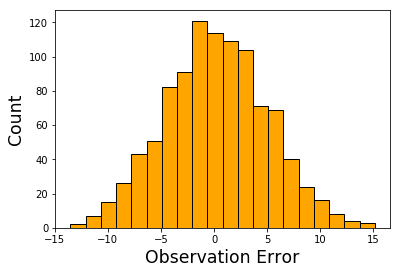

In [16]:
#generate our random data
data = np.random.normal(loc=0.0,scale=5.0,size = 1000)

#plot a histogram of the data

#set how many 'bins' or rectangles we want to divide the data up into for our histogram
n_bins = 20

#plot the histogram
count,bins,ignored = plt.hist(data,n_bins,density=False,color="orange",edgecolor='black')

#set the x and y axis labels
plt.xlabel("Observation Error",size = "xx-large")
plt.ylabel("Count",size = "xx-large")


### Adding error to our linear model in python

Now that we've seen how to generate normally-distributed random numbers, we can use them to add error into our linear model.

To incorporate error, we just add a random number drawn from a normal distribution centered on 0 (this means the average value is 0 as set using the `loc` parameter in `np.random.normal`) to each y value. If you like, you can imagine taking the above histogram, rotating it 90 degrees clockwise, putting it on top of your models prediction line, then drawing one random number from it. Where that number falls will be the *observed* y value. Because the data are normally distributed, numbers close to the correct number are the most commonly observed values, but error will cause you to see y-values that are both bigger and smaller than the model's prediction value.

The `scale` parameter, reflecting the standard deviation of the normal distribution, controls how 'spread out' these errors are — a larger standard deviation value results in a flatter, broader distribution corresponding to greater random error. 



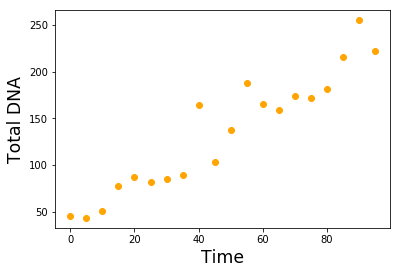

In [17]:
def linear_simulation(x_data,slope,error_stdev = 20, intercept = 0):
    """Return y data given x data and parameters
    x_data -- a list of x data points (ints or floats)
    slope -- the slope of our linear model (m in y=mx+b+error)
    error_stdev -- the standard deviation of normal error
    intercept -- the intercept of our linear model (b in y=mx+b+error)
    """
    y_predictions = []
    for i,x in enumerate(x_data):
        error = np.random.normal(loc=0.0,scale = error_stdev,size = None)
        y = slope*x + error + intercept 
        y_predictions.append(y)
        
    return y_predictions


x_data = list(range(0,100,5))    
y_data = linear_simulation(x_data = x_data,slope = 2.0,intercept =35.0,error_stdev=20.0)
plot_scatterplot(x_data,y_data,xlabel="Time",ylabel="Total DNA")

## Simple Linear regression

In the last section we imagined what would happen if we had a perfect biological model of a process. We saw that due to measurement error, observations will always deviate from model predictions, and noted that we could measure the extent of this difference between prediction and observation using residuals.

Now let's imagine that we are in a situation that is somewhat the opposite of our previous one. Imagine that we do not know for sure the rate of DNA replication in a cell, but we have collected some data on the amount of DNA in various cells at different points in time during the replication process. If we were to plot this data, we might see something like this:

<img src="./resources/linear_scatter_high_r2_linear_regression_no_line.png" width="400"  description="A cartoon of a scatter plot with x and y axes, with orange points and a black regression line just as in the previous figure. Now, however, thin grey lines stretch vertically from each point to the regression line. These are the residuals — the difference between what the regression model predicts and the actual observed data.">

Now it looks like a line might be a reasonable approximation for these points. But if the real trend is linear, how do we best estimate the slope and intercept of that line? This is the question addressed by **linear regression**. 

There are multiple approaches to how to pick the line that best explains the data in linear regression. We noted above that residuals represent differences between the model and the real data, so it probably makes sense that we somehow want to pick a line that keeps those residuals small. 

The simplest approach to picking which line is best, **ordinary least squares**, picks a line that minimizes the squared residuals (hence 'least squares'). This means small residuals have little effect, but large residuals are heavily penalized. But what is the justification for weighting by the square of the residual, rather than, for instance, just the residuals themselves?

### Normally distributed errors and the Central Limit Theorem

**Ordinary least squares** regression assumes that measurement errors are **normally distributed** - that is, that they follow a particular kind of bell curve. If so, then the chances of getting small deviations from our expected value is large, whereas the chances of getting very large deviations from our expected value falls very quickly. For many people, this may be at least a little bit intuitive: you may notice by eye that small deviations from the regression line don't "look bad", whereas larger deviations are very noticable. 

But why on Earth should we think that errors are normally distributed? If you aren't already in the know, it may seem quite odd that everyone is always assuming normally distributed errors. We'll get back to linear regression for a moment, but this point is important enough that it deserves a detour. 

The reason linear regression typically assumes that errors are normally distributed comes from a very famous result in statistics known as the **Central Limit Theorem**. The [Central Limit Theorem](https://en.wikipedia.org/wiki/Central_limit_theorem) says that as the number of observations increases, the sum of independent and identically distributed <abbr title = "random numbers drawn from a distribution"> random variates </abbr> form a normal distribution - even if the distribution those measurements come from isn't itself normal.

Here's a simple example: the chances of rolling each number on a fair die are equal — rolling 1,2,3,4,5,6 each have a 1/6th chance. Statisticians would call this one random variate from a uniform distribution. 

Possible results of rolling one die:<br>
&nbsp;1:&#9861;<br>
&nbsp;2:&#9861;<br>
&nbsp;3:&#9861;<br>
&nbsp;4:&#9861;<br>
&nbsp;5:&#9861;<br>
&nbsp;6:&#9861;<br>

Notice how there is just one way to roll each number, so the results above look 'flat'. This is a *uniform distribution*.

 But what happens when we roll more dice? The distribution formed by the *sum* of two dice rolls — that is two <abbr title="A uniform probability distribution is a flat distribution, meaning if you plotted all possible outcomes on the x-axis  against their probability on the y-axis, you would just get a straight line."> uniform distributions</abbr> — is not itself uniform. Instead, there are more ways to get a 7 — which can be formed by 1 + 6, 2+5, 3+4, etc — than there are a 12 — which can only be formed by rolling two 6's. If we make a histogram showing how often each total number comes up, rolling 1 die will look flat, but 2 dice will look triangular (peaked at 7), while we will see that rolling more dice will approximate a bell curve-shaped normal distribution.
 

Let us illustrate this with a table of all 36 possible rolls of two dice and their sums:
 
**Possible sums of rolling two dice:**<br>
&nbsp;2:&#9856;+&#9856;<br>
&nbsp;3:&#9856;+&#9857; or &#9857;+&#9856;<br>
&nbsp;4:&#9856;+&#9858; or &#9857;+&#9857; or &#9858;+&#9856;<br>
&nbsp;5:&#9856;+&#9859; or &#9857;+&#9858; or &#9858;+&#9857; or &#9859;+&#9856;<br>
&nbsp;6:&#9856;+&#9860; or &#9857;+&#9859; or &#9858;+&#9858; or &#9859;+&#9857; or &#9860;+&#9856;<br>
&nbsp;7:&#9856;+&#9861; or &#9857;+&#9860; or &#9858;+&#9859; or &#9859;+&#9858; or &#9860;+&#9857; or &#9861;+&#9856;<br>
&nbsp;8:&#9857;+&#9861; or &#9858;+&#9860; or &#9859;+&#9859; or &#9860;+&#9858; or &#9861;+&#9857;<br>
&nbsp;9:&#9858;+&#9861; or &#9859;+&#9860; or &#9860;+&#9859; or &#9861;+&#9858;<br>
10:&#9859;+&#9861; or &#9860;+&#9860; or &#9861;+&#9859;<br>
11:&#9860;+&#9861; or &#9861;+&#9860;<br>
12:&#9861;+&#9861;<br>

 
 
If we do the same thing with 3 or more dice, the result will look progressively more and more like a Bell curve shaped normal distribution:

**Possible sums of rolling three dice:**
&nbsp;3:&#9856;&#9856;&#9856;<br>
&nbsp;4:&#9856;&#9856;&#9857;,&#9856;&#9857;&#9856;,&#9857;&#9856;&#9856;<br>
&nbsp;5:&#9856;&#9856;&#9858;,&#9856;&#9857;&#9857;,&#9856;&#9858;&#9856;,&#9857;&#9856;&#9857;,&#9857;&#9857;&#9856;,&#9858;&#9856;&#9856;<br>
&nbsp;6:&#9856;&#9856;&#9859;,&#9856;&#9857;&#9858;,&#9856;&#9858;&#9857;,&#9856;&#9859;&#9856;,&#9857;&#9856;&#9858;,&#9857;&#9857;&#9857;,&#9857;&#9858;&#9856;,&#9858;&#9856;&#9857;,&#9858;&#9857;&#9856;,&#9859;&#9856;&#9856;<br>
&nbsp;7:&#9856;&#9856;&#9860;,&#9856;&#9857;&#9859;,&#9856;&#9858;&#9858;,&#9856;&#9859;&#9857;,&#9856;&#9860;&#9856;,&#9857;&#9856;&#9859;,&#9857;&#9857;&#9858;,&#9857;&#9858;&#9857;,&#9857;&#9859;&#9856;,&#9858;&#9856;&#9858;,&#9858;&#9857;&#9857;,&#9858;&#9858;&#9856;,&#9859;&#9856;&#9857;,&#9859;&#9857;&#9856;,&#9860;&#9856;&#9856;<br>
&nbsp;8:&#9856;&#9856;&#9861;,&#9856;&#9857;&#9860;,&#9856;&#9858;&#9859;,&#9856;&#9859;&#9858;,&#9856;&#9860;&#9857;,&#9856;&#9861;&#9856;,&#9857;&#9856;&#9860;,&#9857;&#9857;&#9859;,&#9857;&#9858;&#9858;,&#9857;&#9859;&#9857;,&#9857;&#9860;&#9856;,&#9858;&#9856;&#9859;,&#9858;&#9857;&#9858;,&#9858;&#9858;&#9857;,&#9858;&#9859;&#9856;,&#9859;&#9856;&#9858;,&#9859;&#9857;&#9857;,&#9859;&#9858;&#9856;,&#9860;&#9856;&#9857;,&#9860;&#9857;&#9856;,&#9861;&#9856;&#9856;<br>
&nbsp;9:&#9856;&#9857;&#9861;,&#9856;&#9858;&#9860;,&#9856;&#9859;&#9859;,&#9856;&#9860;&#9858;,&#9856;&#9861;&#9857;,&#9857;&#9856;&#9861;,&#9857;&#9857;&#9860;,&#9857;&#9858;&#9859;,&#9857;&#9859;&#9858;,&#9857;&#9860;&#9857;,&#9857;&#9861;&#9856;,&#9858;&#9856;&#9860;,&#9858;&#9857;&#9859;,&#9858;&#9858;&#9858;,&#9858;&#9859;&#9857;,&#9858;&#9860;&#9856;,&#9859;&#9856;&#9859;,&#9859;&#9857;&#9858;,&#9859;&#9858;&#9857;,&#9859;&#9859;&#9856;,&#9860;&#9856;&#9858;,&#9860;&#9857;&#9857;,&#9860;&#9858;&#9856;,&#9861;&#9856;&#9857;,&#9861;&#9857;&#9856;<br>
10:&#9856;&#9858;&#9861;,&#9856;&#9859;&#9860;,&#9856;&#9860;&#9859;,&#9856;&#9861;&#9858;,&#9857;&#9857;&#9861;,&#9857;&#9858;&#9860;,&#9857;&#9859;&#9859;,&#9857;&#9860;&#9858;,&#9857;&#9861;&#9857;,&#9858;&#9856;&#9861;,&#9858;&#9857;&#9860;,&#9858;&#9858;&#9859;,&#9858;&#9859;&#9858;,&#9858;&#9860;&#9857;,&#9858;&#9861;&#9856;,&#9859;&#9856;&#9860;,&#9859;&#9857;&#9859;,&#9859;&#9858;&#9858;,&#9859;&#9859;&#9857;,&#9859;&#9860;&#9856;,&#9860;&#9856;&#9859;,&#9860;&#9857;&#9858;,&#9860;&#9858;&#9857;,&#9860;&#9859;&#9856;,&#9861;&#9856;&#9858;,&#9861;&#9857;&#9857;,&#9861;&#9858;&#9856;<br>
11:&#9856;&#9859;&#9861;,&#9856;&#9860;&#9860;,&#9856;&#9861;&#9859;,&#9857;&#9858;&#9861;,&#9857;&#9859;&#9860;,&#9857;&#9860;&#9859;,&#9857;&#9861;&#9858;,&#9858;&#9857;&#9861;,&#9858;&#9858;&#9860;,&#9858;&#9859;&#9859;,&#9858;&#9860;&#9858;,&#9858;&#9861;&#9857;,&#9859;&#9856;&#9861;,&#9859;&#9857;&#9860;,&#9859;&#9858;&#9859;,&#9859;&#9859;&#9858;,&#9859;&#9860;&#9857;,&#9859;&#9861;&#9856;,&#9860;&#9856;&#9860;,&#9860;&#9857;&#9859;,&#9860;&#9858;&#9858;,&#9860;&#9859;&#9857;,&#9860;&#9860;&#9856;,&#9861;&#9856;&#9859;,&#9861;&#9857;&#9858;,&#9861;&#9858;&#9857;,&#9861;&#9859;&#9856;<br>
12:&#9856;&#9860;&#9861;,&#9856;&#9861;&#9860;,&#9857;&#9859;&#9861;,&#9857;&#9860;&#9860;,&#9857;&#9861;&#9859;,&#9858;&#9858;&#9861;,&#9858;&#9859;&#9860;,&#9858;&#9860;&#9859;,&#9858;&#9861;&#9858;,&#9859;&#9857;&#9861;,&#9859;&#9858;&#9860;,&#9859;&#9859;&#9859;,&#9859;&#9860;&#9858;,&#9859;&#9861;&#9857;,&#9860;&#9856;&#9861;,&#9860;&#9857;&#9860;,&#9860;&#9858;&#9859;,&#9860;&#9859;&#9858;,&#9860;&#9860;&#9857;,&#9860;&#9861;&#9856;,&#9861;&#9856;&#9860;,&#9861;&#9857;&#9859;,&#9861;&#9858;&#9858;,&#9861;&#9859;&#9857;,&#9861;&#9860;&#9856;<br>
13:&#9856;&#9861;&#9861;,&#9857;&#9860;&#9861;,&#9857;&#9861;&#9860;,&#9858;&#9859;&#9861;,&#9858;&#9860;&#9860;,&#9858;&#9861;&#9859;,&#9859;&#9858;&#9861;,&#9859;&#9859;&#9860;,&#9859;&#9860;&#9859;,&#9859;&#9861;&#9858;,&#9860;&#9857;&#9861;,&#9860;&#9858;&#9860;,&#9860;&#9859;&#9859;,&#9860;&#9860;&#9858;,&#9860;&#9861;&#9857;,&#9861;&#9856;&#9861;,&#9861;&#9857;&#9860;,&#9861;&#9858;&#9859;,&#9861;&#9859;&#9858;,&#9861;&#9860;&#9857;,&#9861;&#9861;&#9856;<br>
14:&#9857;&#9861;&#9861;,&#9858;&#9860;&#9861;,&#9858;&#9861;&#9860;,&#9859;&#9859;&#9861;,&#9859;&#9860;&#9860;,&#9859;&#9861;&#9859;,&#9860;&#9858;&#9861;,&#9860;&#9859;&#9860;,&#9860;&#9860;&#9859;,&#9860;&#9861;&#9858;,&#9861;&#9857;&#9861;,&#9861;&#9858;&#9860;,&#9861;&#9859;&#9859;,&#9861;&#9860;&#9858;,&#9861;&#9861;&#9857;<br>
15:&#9858;&#9861;&#9861;,&#9859;&#9860;&#9861;,&#9859;&#9861;&#9860;,&#9860;&#9859;&#9861;,&#9860;&#9860;&#9860;,&#9860;&#9861;&#9859;,&#9861;&#9858;&#9861;,&#9861;&#9859;&#9860;,&#9861;&#9860;&#9859;,&#9861;&#9861;&#9858;<br>
16:&#9859;&#9861;&#9861;,&#9860;&#9860;&#9861;,&#9860;&#9861;&#9860;,&#9861;&#9859;&#9861;,&#9861;&#9860;&#9860;,&#9861;&#9861;&#9859;<br>
17:&#9860;&#9861;&#9861;,&#9861;&#9860;&#9861;,&#9861;&#9861;&#9860;<br>
18:&#9861;&#9861;&#9861;<br>
 

The Central Limit Theorem tells us this isn't just a weird special property of rolling dice and adding up their values, but instead is a *general* property of adding up independent random values drawn from any kind of distribution. 

This means that if we have many different sources of error that influence our result, as long there are lots of them and our total measurement error can be approximated by the sum of those individual errors, then we can use a normal distribution to model the types of measurement errors we expect and their properties.

#### Ordinary Least Squares helps find the model parameters that best explain the data if errors are normal

In the previous section we saw that the Central Limit Theorem means that the sum of a large number of random variates from many statistical distributions will itself be normally distributed, even if the underlying statistical distribution(s) are not. 

This means that a normal distribution is often a pretty good approximation for **measurement error**. That's very good news when true, because if we have a particular normal distribution, we can calculate the exact chances of drawing a particular number from it. 





#### Linear regression in Python

We can infer a regression model that best explains the data using **ordinary least squares** regression, which minimizes the sum of squared difference between each data point and the predicted line (x - mean)^2. This also maximizes the likelihood of the model, since when drawing random numbers from a normal distribution, the probability of getting a given level of error (distance from the mean) deceases with the square of the size of that error.

The `statsmodels` python package provides a nice interface to do linear regression that can handle more complex cases as well.

In [18]:
import statsmodels as sm
import statsmodels.formula.api as smf
import pandas as pd

df = pd.DataFrame({"x":x_data,"y":y_data})
df.set_index("x")

model = smf.ols(formula='y ~ x', data=df)
results = model.fit()
summary = results.summary()
print(summary)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.905
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                     170.6
Date:                Thu, 15 Jul 2021   Prob (F-statistic):           1.28e-10
Time:                        14:24:55   Log-Likelihood:                -87.304
No. Observations:                  20   AIC:                             178.6
Df Residuals:                      18   BIC:                             180.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     38.4136      8.646      4.443      0.0

### Interpreting our results. 

**Estimated slope and intercept**. The number under coef. (coefficient) tells you the intercept (for the row labelled Intercept) and the slope on our one x variable (in the row labelled x). The final two rows also give you a 95% confidence interval on that number.

Note that the slope and intercept from linear regression will almost always be at least a little bit wrong compared to the true values. When I ran our above code, I got an inferred slope of ~1.7 instead of 2, and an inferred intercept of ~52 rather than 35. However, both the true slope and true intercept are within the 95% confidence interval of the estimate.

However, assuming the assumptions of linear regression are met (e.g. error is normal, the trend really is linear, data points are independent and identically distributed observations), the more data available, the closer linear regression will get to the right answer.

**Effect Size**. The 'effect size' of a linear regression is reported in the R<sup>2</sup> value. It says what proportion of variance in the data is explained by your model. A value close to 1.0 means that your model's predictions predict virtually all the differences in `y` values that you observe. A value close to 0.0 means that your model predicts almost nothing about `y`. I got an R<sup>2</sup> value of ~0.9 indicating that about 90% of the variance in y in this dataset could be explained by the model. 

**Significance**. There are multiple ways to test how good of a job a model does at explaining data. We will explore these later. For now, note that there is a P-value column in the results. The p-value  represents the chances of getting as good of a fit as you actually got or better under the null hypothesis that the slope is 0 (e.g. a flat line where x has no effect on y). The intercept represents the same for the null hypothesis that the intecept is 0. p-values that are below 0.05 are traditionally considered significant. In my results both the intercept and slope p-values are 0.0, indicating the data are extremely unlikely under either null hypothesis.

We will return in much greater detail to how model parameters (like slope and intercept), effect size (like R<sup>2</sup>) and significance iteract in another chapter.



## Multiple Linear Regression

Multiple linear regression refers to linear regression with more than one predictor variable. These predictors might be continuous or categorical. Let's start with an example that includes categorical data, since these are easiest to draw. We'll apply the same ideas to continuous data afterwards. 

To develop a graphical intuition for why multiple linear regression is often needed, let's imagine that when we did our DNA replication rate experiments in a second cell type, and colored our results from each type of cell (say skin vs. bone cells) a different color.  Our data look like this:

<img src="./resources/linear_scatter_multivariate.png" width="400"  description="Another scatter plot. Now however there are two sets of points - one set orange, and one cyan. These sets of points roughly form separate diagonal lines, with the orange line offset so it is above the cyan one">

We could, of course, ignore the type of cell we collected the data from and try to run a linear regression. However, the results would not be very satisfactory:

<img src="./resources/linear_scatter_multivariate_with_single_regression.png" width="400"  description="Another scatter plot with two sets of points — one orange and one cyan — trending upwards and to the right. A black regression line is plotted. It does head up and to the right, but it falls between the orange and cyan points. It is clear that it will always underestimate the value of the orange points, and overestimate the cyan ones.">

While our line does fall roughly in the middle of all the data, it is clear that it will always underestimate the value of the orange points, and overestimate the cyan ones. To my eye, at least, it feels like we need *two* lines, one offset from the other by a fixed amount in order to explain these data:

<img src="./resources/linear_scatter_multivariate_with_two_regression.png" width="400"  description="Another scatter plot with two sets of points — one orange and one cyan — trending upwards and to the right. Now each color of points has it's own regression line, and they seem to match the data pretty well.">

How could we incorporate this into our equation for a line? One way would be to let our line represent the value of the blue points, but add a positive number to the prediction of the line whenever we got to an orange point. This would have the effect of predicting the blue points with our line, and our orange points with our line plus some fixed value. But how can we represent that mathematically?

The trick is to recognize that our categorical value (orange vs. blue) is binary in nature — each point is either orange or blue — and we can therefore represent one value with a `1` and the other with a `0`. This approach is sometimes called generating a 'dummy variable' to hold our categorical data.

Let us rewrite our equation for a line using full words instead of variables. We will now include a *second* x value that represents whether a point is orange (1) or blue(0). That second x value, just like the first x value will be associated with it's own slope, which we'll for now call `effect_of_color`. 

`y = mx + is_orange * effect_of_being_orange + b + error`

The is_orange parameter above is just 1 if the point is orange, or 0 otherwise. Since 0 times any number is just 0, this means that the `effect_of_color` value will only be added to the y value if we are dealing with an orange point! 

Now of course, conventionally, statistical equations aren't written out in words but rather with more concise symbols. Here's a critical observation: the parameter `is_orange` is effectively just another x value, and the parameter `effect of being orange` is effectively just another slope that gets multiplied by some x values to contribute to the result. 

That is, we now have a **multiple linear regression** with *two* x values that each can have different slopes.

Here's how the equation might look if we modified the most familiar form of the equation for a line:

y = m<sub>1</sub>x<sub>1</sub> + m<sub>2</sub>x<sub>2</sub> + b + error

Now in our DNA replication example we would have two x values: the amount of time that has passed (x<sub>1</sub>), and the type of cell (x<sub>2</sub>). The second x value would be just like our `is_orange` variable up above.

If we extended our 'mathy' looking version of the same equation, it might look something like this:

y = &beta;<sub>0</sub>x<sub>0</sub>  + &beta;<sub>1</sub>x<sub>1</sub> + &beta;<sub>2</sub> + &epsilon;
    
Remember that despite this now looking more mathematically formal, we're representing a really really simple idea: we have a linear model that predicts y from our first x value (x<sub>0</sub>). We also have two colors, one is offset from the other, so we just bump our estimate of y up a bit (specifically an amount described by &beta;<sub>1</sub>) if the point is orange (x<sub>1</sub> is not equal to 0). 

What if we had more than two categories (e.g. 3 colors, 4 cell types, etc)? If these categories aren't aranged in a particular order, we can't use a single binarry variable to represent this. Instead we would need to generate several 'dummy variables' that can represent different colors or cell types as a 0 or 1. So for instance, if we had measured 4 blood cell types (let's say basophils, thrombocytes, macrophage, and plasma cells) we might have variables is_basophil, is_thrombocyte, and is_macrophage, each of which is a 1 if a cell falls into that category. Note that we need 1 fewer dummy variable than the number of cell types, because in our analysis anything that isn't a basophil, thrombocyte or macrophage must be a plasma cell, since those are the only cell types we measured. Using this general trick of converting categorical data into many binary variables, we can represent any categorical data we choose in our linear models in a simple way.


### Simulating a multiple linear model in python

We can simulate a multiple linear model in python by modifying our previous simulation.

If we have two x values, one reflecting some quantitative measurement, and another a category. It will take a little more work to plot, but the idea is the same: we take in an extra x variable (let's call it `x2`), define a second slope (let's uncreatively call it `slope2`) and then just add an extra x2 * slope2 term to our equation that predicts `y`. Otherwise this is just the familiar equation for a line, with normal errors added:

In [45]:
def linear_simulation(x_data,x2_data,slope,slope2,intercept = 0,error_stdev = 0):
    """Return y data given x data, x2 data and parameters
    x_data -- a list of x data points (ints or floats)
    x2_data -- a list of x2 data points (ints or floats), that must be of the same length as x_data
    slope -- the slope of y in response to x our linear model 
    slope2 -- the slope of y in response to x2 in our linear model
    intercept -- the intercept of our linear model (b in y=mx+b+error)
    error_stdev -- the standard deviation of normal errors
    """
    y_predictions = []
    for i,x in enumerate(x_data):
        x2 = x2_data[i]
        error = np.random.normal(loc=0.0,scale = error_stdev,size = None)
        y = slope*x + slope2*x2 + intercept + error
        y_predictions.append(y)
        
    return y_predictions

Now let's write a function to plot a scatterplot of both our actual data and lines representing the 'biological truth' according to our model.

In [46]:
def plot_colored_scatterplot(x,y,x2,true_y=None,colors =["orange","skyblue"],markers=["^","s"],\
  labels=["Skin Cell","Heart Cell"],xlabel="x",ylabel="y"):
    """Plot a colored scatterplot of x vs. y"""
    categories = np.array(x2)
    colormap = np.array(colors)
      
    for i,color in enumerate(colors):
            
        x_of_this_color = [curr_x for j,curr_x in enumerate(x) if x2[j] == i]
        y_of_this_color = [y[j] for j,x in enumerate(x) if x2[j]==i]
        
        curr_marker = markers[i]
        curr_label = labels[i]
        plt.scatter(x_of_this_color,y_of_this_color,c=color,marker=curr_marker,label=curr_label)
        
        if true_y:
            x_of_this_color = [curr_x for j,curr_x in enumerate(x) if x2[j] == i]
            true_y_of_this_color = [true_y[j] for j,x in enumerate(x) if x2[j]==i]
            plt.plot(x_of_this_color,true_y_of_this_color,"-",color=color)
            
    plt.xlabel(xlabel, size = "xx-large")
    plt.ylabel(ylabel, size = "xx-large")
    plt.legend()

Finally, let's plot the results of simulations from our multiple linear model:

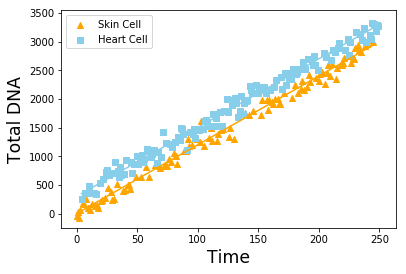

In [47]:
import numpy as np
from random import choice

#simulate observed data points
N = 250 #number of data points


#x values will be a number
x = [i for i in range(N)]

#x2 values in this case will be a category
#represented by 0 or 1
x2 = [choice([0,1]) for i in range(N)]

x1_slope = 12  #increase in y with each x
x2_slope = 300 #difference between cyan and orange
intercept = 0 #intercept
error_stdev = 100 #measure of 'scatter' or 'spread' of points around the model prediction


observed_y = linear_simulation(x,x2,slope=x1_slope,slope2=x2_slope,\
  intercept=intercept,error_stdev=error_stdev)

true_y = linear_simulation(x,x2,slope=x1_slope,slope2=x2_slope,error_stdev=0)

plot_colored_scatterplot(x=x,y=observed_y,x2=x2,true_y=true_y,xlabel="Time",ylabel="Total DNA")




**Stop and Think**: compare this linear simulation function to the one earlier in the chapter. Imagine running the single-variable linear model with `x = [0.0,1.0,3.0,4.0]`, `slope = 2.0`, `intercept=10.0`. Now imagine running this function with `x = [0.0,1.0,3.0,4.0]`, `x2 = [13.0,12.0,11.0,10.0]`, `slope = 2.0`, `slope2` = 0.0, `intercept=10.0`. Do you think the the two functions return the same or different y values? Why? 

**Try it out**. Test your prediction by generating y values using both the single and multiple linear models using the parameters described above. If you like, you can set up a new Jupyter Notebook in which to run this. Do the two sets of predictions differ? 

**Try it out** Now, repeat the exercise setting slope2 in the multiple linear model to `5.0`. Do you think the y values will differ? Do they?

### Fitting a Multiple Linear Model from Data in Python

Look at the graph up above. Let's say we had measured this data and didn't know what model had produced it. We could use ordinary least squares model fitting to try to figure out how well the data fit to a multiple linear  model in which y (`Total DNA`) is determined by the amount of time that has passed (time or `x1`) and what type of cell we are studying (skin vs. heart cells, as represented by whether `x2` is 0 or 1).

To fit this multiple linear model in `statsmodels.py`, we don't have to change much - we simply adjust our equation from `y ~ x` to `y ~ x + x2`

In [48]:
import statsmodels as sm
import statsmodels.formula.api as smf
import pandas as pd

#Set up our data table
#Note that x, x2, and observed_y were generated in the previous cell. 
#(if you get a NameError, back up and generate them)
df = pd.DataFrame({"x":x,"y":observed_y,"x2":x2})
df.set_index("x")

#Here is where we actually fit our linear model to our data
model = smf.ols(formula='y ~ x + x2', data=df)
results = model.fit()
summary = results.summary()
print(summary)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.988
Model:                            OLS   Adj. R-squared:                  0.988
Method:                 Least Squares   F-statistic:                 1.006e+04
Date:                Thu, 15 Jul 2021   Prob (F-statistic):          2.31e-237
Time:                        16:19:29   Log-Likelihood:                -1499.0
No. Observations:                 250   AIC:                             3004.
Df Residuals:                     247   BIC:                             3015.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      8.4306     14.023      0.601      0.5

#### Interpreting our results.

We interpet the results as before. Now, however, the `coef` column represents the value that the regression analysis inferred for the slope associated with x **and** x2. So for example, I got an x coefficient of 11.87 (yours may be slightly different due to differences in the random simulation). This implies that each time x goes up 1 unit, y goes up roughly 12 units. The coefficient labelled 'Intercept' is again just the inferred intercept (e.g. the b in the equation for a line y = mx + b). The effect size (R<sup>2</sup>) and p-values are interepreted as before.



### The same linear model equation can handle both binary and continuous `x` variables

<img src="./resources/linear_scatter_multivariate_with_two_regression.png" width="400"  description="Another scatter plot with two sets of points — one orange and one cyan — trending upwards and to the right. Now each color of points has it's own regression line, and they seem to match the data pretty well.">

We started our investigation of multiple linear models with orange and blue colors as our second indepedent or `x` variable. This was mostly because this example is easy to draw. However, as you can see from the above equations, there's nothing special about the math that requires our second x variable to be categorical. We can still just multiply `y` = `x1`*`slope1` + `x2`*`slope2` + `intercept` if x2 is a continuous variable rather than a categorical one.

So using what we've already worked out, you could *also* build models that use two or more continuous x variables. For example, you might model the mating success of a male elk based on several continous factors like it's size, it's age, the number of competitors, etc. Each of those factors would be its own x variable (age could be x<sub>0</sub>,number of competitors could be x<sub>1</sub>, etc), and each factor would have it's own slope or coefficient that says how it affects mating success (e.g. the effect of age would be represented with &beta;<sub>0</sub>, the effect of number of competitors could be represented with &beta;<sub>1</sub>, etc). 

> To model extra independent predictor variables in linear regression, we just add extra slopes and x's to our equation for a line. If these predictors are categorical, we convert them into binary variables that can be represented by 1's or 0's.

**Summary**. By extending the familiar equation for a line with an error term (&epsilon;) that typically represents errors drawn from a normal distribution, and adding extra variables and slopes, we have a pretty powerful way of representing the independent effects of several different parameters on a response variable that we care about. The major limitation of our approach so far is that the effects must be *independent*, because mathematically we are just adding together each factor's effects.  In the next section, we will elaborate on this to allow for situations in which x variables *interact* with one another to influence the y value. 

## Multiplication can model interactions between two predictor variables

All of our above math stemmed from our observation in the cartoon that one line for some orange points looked offset from the line for other points. But, critically, in that example both sets of points seemed to have the same slope. What if instead we have data that looks more like this:

<img src="./resources/interaction_effect_no_lines.png" width="400"  description="Another scatter plot with two sets of points — one orange and one cyan. Now, however, the orange points trend downward while the cyan ones trend upward as the x value increases.">

It looks like the orange points have a positive slope, while the cyan points have a negative slope. That is, unlike in our last example, the color of the points doesn't just change the y value by a fixed amount — it actually reverses the slope! 

This is an example of an **interaction effect**. If you plot your data by category as in the plot up above, and your different categories appear to have different slopes, that suggests you should test for an interaction effect in your data. It may not be there — the other possibility is that any apparent differences are just due to chance — but it's worth testing. We can think about how to test the statistical significance of interaction effects in several different frameworks latter, but for now let's try to figure out how to incorporate them into our linear model. 

We can think of the situation depicted in the plot up above as an [interaction](https://en.wikipedia.org/wiki/Interaction_(statistics)) between the `color` and `x` variables. Here, the word interaction just means that the outcome of having different color and x variables can't be predicted by simply adding up the independent effects of color (orange is a little higher) and the `x` parameter. Since the math we developed in the previous section just added up terms, it can't handle interaction effects. However, a very simple extension of that math can handle this situation.

We can model interactions using multiplication. Specicially, we will add an extra term to our linear model that includes the interaction of x value and being orange, times `x` and times the `is_orange` value: `interaction_of_x_and_orange` * `x` * `is_orange`. The `interaction_of_x_and_orange` term will be inferred from the data using ordinary least squares, and the product of these values will be added into our linear model just like all the other terms.

Before we add this to the equation, let's consider what we would get if we just modeled the cyan points. We'd get a negative slope, because y goes down as x increases for the cyan points. Let's imagine that the slope of the line describing the cyan points is -0.75 (just my guess based on the cartoon for now). Now we want the slope to be positive  if the points are orange, since those points are going up not down. If the `interaction_of_x_and_orange` is 2, then when a point is orange (and therefore `is_orange` is `1`), a prediction based on a positive slope is incorporated into the `y` value. Since the interaction term is bigger than the main slope (|2| > |-0.75|), our interaction term would overwhelm the negative trend in the case of orange points only, causing the orange slope to go up rather than down. This is what we wanted! Here's how all that would look if we wrote it out with descriptive variable names. The equation is long, but there's nothing super complex going on here:

`y = x * effect_of_x + is_orange * effect_of_being_orange + interaction_of_x_and_orange * x * is_orange + intercept + error`

Since this is getting annoyingly long to write out, a more mathematical representation becomes a bit easier to read (consult the explanations above if this notation is still unfamiliar):

y = &beta;<sub>0</sub> + &beta;<sub>1</sub>x<sub>1</sub>  + &beta;<sub>2</sub>x<sub>2</sub> + &beta;<sub>3</sub>x<sub>1</sub>x<sub>2</sub> + &epsilon;

As with our 'dummy variable' approach to handling categorical data, there are several extensions that are possible to this multiplicative approach to handling interaction effects. If we are testing for more than one interaction effect, for instance, we can add more than one term. For instance, if studying the effects of age, diet, and microbiome diversity on the ability of Woodrats to put on weight, we might have a `diet*microbiome` interaction term to test whether microbiome diversity matters more for some diets vs. others, and also an `age * diet` term to check whether, for example, diet matters more for very young woodrats vs. mature ones. 

### Simulating a multiple linear model with an interaction effect in Python

We can model **interaction effects** by assigning a slope to the product of our two x values. Let's update our `linear_simulation` function to have a third slope that will be multiplied by `x*x2`. Thus, the results will be identical to those of our multiple linear model, except that we will add the product `slope3*x*x2` to them.

First, we modify our simulation function:

In [49]:
def linear_simulation_with_interaction(x_data,x2_data,slope,slope2,\
  interaction_slope,intercept = 0,error_stdev = 0):
    """Return y data given x data and parameters
    x_data -- a list of x data points (ints or floats)
    slope -- the slope of our linear model (m in y=mx+b+error)
    intercept -- the intercept of our linear model (b in y=mx+b+error)
    error -- the standard deviation of normal errors
    """
    y_predictions = []
    for i,x in enumerate(x_data):
        x2 = x2_data[i]
        x_interaction = x * x2
        
        error = np.random.normal(loc=0.0,scale = error_stdev,size = None)
        y = intercept + slope*x + slope2*x2 + interaction_slope * x_interaction +  error
        y_predictions.append(y)
        
    return y_predictions

Next, we plot the data for an example simulation:

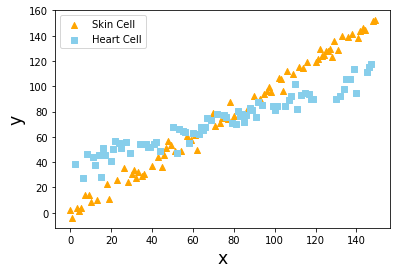

In [50]:
import numpy as np
from random import choice

#simulate observed data points
N = 150 #number of data points


#x values will be a number
x = [i for i in range(N)]

#x2 values in this case will be a category
#represented by 0 or 1
x2 = [choice([0,1]) for i in range(N)]

x1_slope = 1  #increase in y with each x
x2_slope = 35 #difference between cyan and orange
intercept = 0 #intercept
error_stdev = 5.0 #measure of 'scatter' or 'spread' of points around the model prediction
interaction_slope = -0.5

observed_y = linear_simulation_with_interaction(x,x2,slope=x1_slope,slope2=x2_slope,\
  interaction_slope = interaction_slope,intercept=intercept,error_stdev=error_stdev)

true_y = linear_simulation(x,x2,slope=x1_slope,slope2=x2_slope,error_stdev=0)

plot_colored_scatterplot(x=x,y=observed_y,x2=x2)

Notice how now the orange and blue series now not only have different intercepts, but also different slopes. Specifically, the higher that x1 is, the bigger the product of x2 * x1 * the interaction slope (-0.5) becomes. When x1 is low, this product is small, and so the large x2 slope causes the blue points to be higher. As we move along the x axis, the product of x1*x2*interaction_slope becomes larger for the blue points (but not orange ones since orange is assigned an x2 value of 0 and therefore this product is always 0 for the orange points). This is an interaction effect!

**Stop and think**. What do you think would happen if you set the parameter interaction_slope to 0 in the above code? What about +0.5? Jot down your predictions, then try it out for yourself. Can you explain why the graph looks the way it does?

In [32]:
df = pd.DataFrame({"x":x,"y":observed_y,"x2":x2})
df.set_index("x")

model = smf.ols(formula='y ~ x + x2 + x * x2', data=df)
results = model.fit()
summary = results.summary()
print(summary)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.982
Model:                            OLS   Adj. R-squared:                  0.982
Method:                 Least Squares   F-statistic:                     2648.
Date:                Thu, 15 Jul 2021   Prob (F-statistic):          5.04e-127
Time:                        14:54:57   Log-Likelihood:                -444.73
No. Observations:                 150   AIC:                             897.5
Df Residuals:                     146   BIC:                             909.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.9836      1.070      0.919      0.3

**Interpretation**. The model is interpreted as above. Pay careful attention to the coef column that indicates each slope, the R<sup>2</sup> value that indicates effect size, and the p-values for each term (which indicate statistical singificance). The main difference from the other examples in this section is that now there is a row in the results labeled `x:x2`. This row represents the slope and significance of the interaction between `x` and `x2`.



### Is error model error or measurement error? 

So far we're established that in any real experiment there will be measurement error. That error will cause our *observed* measurements to deviate from expected values, and those differences can be measured with residuals. 

If measurement error were the only reason data could deviate from our model, then our job would be relatively simple: we could simply measure the average distance our points fell from our line — that is, the average magnitude of our residuals — and from that we'd have a sense of the scale of the measurement error.

There is one major problem with applying our discussion above to the real world. The whole time we assumed that the biological rate of DNA replication really was perfectly linear, and it really occurred at the rate we said it did (the rate we put into the `rate_of_dna_replication` variable). Those assumptions were useful to discuss measurement error, but in reality we can rarely or never just assume our model is correct. Instead, we have to test that using data.

But we have just established that the presence of measurement error means our data will never perfectly match our model, so how do we tell whether differences between our actual data and our prediction are due to **measurement error** or **model error**?  

For instance, the results shown up above may look pretty good with a regression line drawn through them, but what if in truth the `y` value were not changing at all? This might happen, for instance, if replication was not actually happening. If the 'no replication' model were correct, we would have a slope of 0, reflecting the idea that over the course of the experiment no new DNA is being synthesized. Our results, with a 'null model' of no replication drawn on top of them, might look like this:

<img src="./resources/linear_scatter_high_r2_linear_regression_null.png" width="400"  description="A cartoon of a scatter plot with x and y axes. A series of orange points is plotted. The points have some scatter to them, but roughly form a diagonal line from the lower left to the upper right of the plot. A black regression line runs diagonally through the points. ">

To my eye at least, it is suddenly somewhat less clear that these results represent a real linear trend. If someone told us that this uninteresting null model were the truth, do we really have enough data to establish that that is very unlikely?

### Frequentist testing of null models with p-values
It turns out there are several different approaches to the is question in statistics.  **Frequentist** approaches ask how often we would get results as different from our model as we observed, if our null model (e.g. here that the slope &beta;<sub>1</sub> is 0) were in fact true. This frequency is then represented in a `p` value, with lower p values indicating lower changes of getting these data under the null model. Traditionally, p values for a null model that are less than or equal to 0.05 — a 5% or smaller chance of getting errors this big under the null model — are considered statistically significant. It's important to note that rejecting our null model (in which &beta;<sub>1</sub> = 0) doesn't directly prove that some other model is correct, it merely indicates that somethng more interesting than the null model may be going on.

Note that in the output from `statsmodels` `OLS` model, we get a p-value for *each* slope. This reflects that we may find that the influence of some variables under a model may not be significant while others are.

### Information-theoretic model comparison with the Akaike Information Criterion
An alternative way of trying to figure out what model best describes our data is to use **information theory** to compare among several models. To do this, we would first translate several conceptual models for what is going on into mathematical equations. Then, we can compare these various models based on which has the highest likelihood, which is just the chances of getting the data we actually saw if the model were true. Because more complex models tend to look like they fit data better than simple ones — even if they are totally off-base —, model-comparison approaches apply a penalty for each parameter in a model. The [Akaike Information Criterion](https://en.wikipedia.org/wiki/Akaike_information_criterion), often abbreviated AIC is a simple equation that let's us adjust the score of a model based on it's likelihood — which again is just its chances of producing the data we actually saw — based on the number of parameters in the model:

$$AIC = 2k - 2ln(\mathcal{L})$$

Where `k` is the number of parameters in the model (so 2 for the equation for a line, since a line has a slope and intercept parameter), and L is the likelihood you get for the best fit of the model to the data (e.g. the chances of getting the data due to measurement error if the data were really produced by a given model). A *lower* AIC indicates a model we should trust more. But notice that each extra parameter (adding 1 to `k`), has to be balanced by a full natural logs worth of likelihood (ln(*L*)) in order to prevent the score of our model from getting worse. In this way, a straight line that explains the data pretty well will be preferred over a more convoluted model, *unless* that more complex model does a much better job of predicting the data and is therefore justified in its complexity.  

In the `OLS` data from `statsmodels.py`, we can look at the `AIC` entry for our model. If we then fit *another* model to the data, we can compare the two `AIC` values. The model with the smaller `AIC` value is a better explanation of the data. 

### Bayesian model comparison with posterior probabilities
Finally, it is also possible to use **Bayesian** statistics to try to figure out a true **posterior probability** that your hypothesis is correct, given your results. To do so however — and this is a big catch — you must specify all the possible mutually-exclusive hypotheses that could explain your data, as well as the **prior probability** that they were true before looking at your data (i.e. based on previous evidence you already had going into your study). In real situations, it is often very difficult to specify all of these, or to find a defensible prior probability for each. Therefore, the calculated posterior probability is an approximation. Nonetheless, Bayesian approaches can be a very powerful approach, and can be adapted to complex situations.

In terms of calculation, the Bayesian posterior probability of a hypothesis (let's call it hypothesis 0 or **H<sub>0</sub>**) given some data — **p(H<sub>0</sub>|Data)** — is just the likelihood of your hypothesis based on the data  — p(Data | Hypothesis <sub>0</sub>) — times the prior probability of your hypothesis — p<sub>prior</sub>. That whole quantity is then normalized by dividing the result by the same calculation applied to all the other hypotheses that could explain your data:

$$p(H_0|Data) = \frac{p_{prior}(H_0) * p(Data|H_0)}{\sum_{i=0}^{n} p_{prior}(H_i) * p(Data|H_i) }$$


What does all this mean? There are several implications hidden in Bayes' Theorem that are worth spelling out.

1. **Equal evidence means equal chances each hypothesis is correct if all your priors are equal**, and the chances of getting your data are equal under all your hypotheses, then the posterior probability of your "main" hypothesis **H<sub>0</sub>** is just 1 divided by the number of hypotheses. This means that if you have no prior reason to prefer one hypothesis over another, and your data could be explained by all hypotheses equally, it's basically drawing straws or rolling dice to figure out which hypothesis is correct — they all have equal posterior probabilities.

2. **Any hypothesis that couldn't generate the data you saw is ruled out.** If any hypothesis literally could not explain the data you saw — that is, if you could not generate the data you saw using the mathematical model that represents that hypothesis — then p(Data|Hypothesis) is 0.0 for that hypothesis. Since any number times 0 is 0, this means that the whole numerator is 0, and indeed the final probability that the hypothesis is true is 0. Many well-designed experiments attempt to generate clear-cut situations like this in order to rule out some hypotheses, if warrented by the data.

3. **Extraordinary claims require extraordinary evidence**. If before doing an analysis, the chances that a hypothesis is true (as represented in the equation by p<sub>prior</sub>) are very low, then you will need a lot of evidence (as represented by the likelihood of that hypothesis given the data) for that hypothesis to become plausible. For instance, even if model<sub>1</sub> is 10 times more likely to generate the observed data than model<sub>2</sub>, if model<sub>1</sub> starts with a 1 in 100 chance of being true (p<sub>prior</sub> = 0.01), then even after seeing that data you would treat model<sub>2</sub> as more likely. This is similar to the idea that even if you have seen tape of an Unidentified Flying Object that would make sense if high-tech aliens had visited the Earth, and that isn't easily explained otherwise, you may not yet be convinced of the presence of actual aliens since your prior probability that aliens are visiting the earth may be very very low.

## Summary

- A linear model is one that uses the equation for a line to predict some response variable. 
<br><br>
- A linear regression tries to infer the slope and intercept of a linear model based on the data. 
<br><br>
- Regardless of whether you came up with your model *a priori* or inferred it using linear regression, there are likely to be differences between the data and your model. That is, even if your model is basically correct, data you observe generally won't fall perfectly on the line predicted by your linear model due to **measurement error**. Data may also not fall on the line predicted by your model due to **model error** - that is, because your model is wrong.
<br><br>
- We can simulate measurement error relative to our model, to see what types of data we should expect if the model is correct, for various levels of **measurement error**
<br><br>
- The **Central Limit Theorem** says that the sum of many independent and identically distributed random variates form a normal distribution - even if the distribution those measurements come from isn't itself normal. Therefore, although we can't typically know all the sources of measurement error comes from, if we assume that the total measurement error is the sum of many smaller independent errors from various sources, then the Central Limit Theorem suggests that a *normal distibution* is a reasonable way to approximate measurement error.
<br><br>
- We can build a linear model that incorporates error by adding an error term to the equation for a line: `y = mx + b + error`.If we want this equation to look fancy and statistical, we can write it in a more statistically conventional way: y = &beta;<sub>0</sub> + &beta;<sub>1</sub>x<sub>1</sub>  +  &epsilon; . In this version, &beta;<sub>0</sub> is the constant or intercept term, &beta;<sub>1</sub>x<sub>1</sub> is the slope, and &epsilon; is the error. 
<br><br>
- Because error is random, the error term &epsilon; in our stochastic linear model for each point is not the same. Instead, in this notation each &epsilon; is assumed to be drawn at random from a normal distribution.
<br><br>
- We can use several techniques, including p-values for null models, AIC values for model comparison, or Bayesian posterior probabilities — to get a sense of whether differences between our model predictions and our actual observations are easily explained by **measurement error** or might instead be due to **model error**.
<br><br>
- In **frequentist statistics**, p-values can be used to describe the probability that the difference between the predictions of any given model and our actual data is due to chance. We can do this either for our main model (to show that deviations between our model and the data could easily be explained by measurement error) or more typically for a **null model** in which the slope of the regression line is 0. If that null model is a very unlikely explanation for the data (typically because p <= 0.05), that lends support to the idea that the actual model is one in which the slope is not 0.
<br><br>
- In **information-theoretic** model comparison, we try to figure out which of several models best explains the data, while penalizing models for their complexity. This is important because more complex models are not always better - on small datasets especially, more complex models have many knobs to turn and levers to pull that can make it look like they fit the data almost perfectly, even though in reality the results will not generalize at all to other datasets. While simpler models may not fit the data perfectly, they often generalize better to other datasets. Therefore, the Akaike Information Criterion balances the number of parameters against the natural log likelihood of the model (how well it explains the data). This means that more complex models can be justified - but only if they do a much better job of explaining the data than a simpler model.
<br><br>
- Using **Bayesian statistics**, we list all the hypotheses that could explain the data, and then compare them using a calculation that incorporates both prior information about the chances that a hypothesis is correct (it's 'prior probability'), and the ability of each hypothesis to explain the data at hand. Bayes' theorem allows us to combine this information to — in principle at least — calculate the actual chances that our Hypothesis of interest is true.
<br><br>









## Exercises

**Exercise 1**. Sketch what shape of line you expect from the following equation:

y = &beta;<sub>0</sub> + &beta;<sub>1</sub>x

if &beta;<sub>0</sub> = 3.5 and &beta;<sub>1</sub> = 0

You can sketch this in a graphics program, by hand on graph paper or generate a plot using python code.   

**Exercise 2** You are studying the transmission rate of an airborne virus in two different hosts: humans and bats. You expect that these hosts differ in transmission rate of the virus. In both cases, you expect that the transmission rate of the virus depends on viral load in an individual. Write the equation for a linear model that predicts transmission rate based on viral load and host, and incorporates an error term. Note that in Jupyter notebooks you can use the text `&beta;` to generate a Beta symbol &beta;, `&epsilon;` to generate an epsilon &epsilon;, and `x<sub>1</sub>` to generate subscripts for variables like x<sub>1</sub>.

**Exercise 3**. Examine your above equation. Did you include an interaction between host and viral load? Why or why not?

**Exercise 4**. Imagine that you put slips of paper with the numbers 1,2,3,4, and 5 into a hat. Then you reached into the hat, drew a number and wrote it down. You then repeated this hundreds of times and summed up your result. What type of statistical distribution would you expect the results to form? Sketch or descibe how you expect the graph to look.

*Hint*: you are calculating the sum of a large number of random variates from a uniform distibution
*Hint2*: if you're stuck, reread the section on the Central Limit Theorem 

**Exercise 5**. Write python code that simulates the situation in Exercise 4. Do your simulation results match your expectations?

**Exercise 6**. You have measured data on the armor thickness of a particular type of crustacean at several ages. In each observatin you have also recorded the presence or absence of predators nearby. Each row of your data table represents one individual crustacean that you measured.

Here is how your data table looks:


|  Armor Thickness (mm) | Age (months)        	| Predators (1 = present) 	|
|--------------------	|--------------------	|------------------------	|
| 20.1                  | 0                   	| 0                   	    |
| 19.5                  | 0                     | 0                         |
| 70.3                  | 0                     | 1                         |
| 69.0                  | 0                     | 1                         |
| 21.9                 	| 1                  	| 0                  	    |
| 20.9                  | 1                     | 0                         |
| 22.1                 	| 2                  	| 0                  	    |
| 73.4                 	| 3                  	| 1                  	    |
| 23.5                  | 3                     | 0                         |
| 74.7                 	| 4                  	| 1                  	    |
| 75.1                 	| 5                  	| 1                  	    |
| 25.0                  | 5                     | 0                         |
| 25.3                  | 5                     | 0                         |

In python, fit a multiple linear regression of Age and the presence of Predators using your data.

**Answer the following in your response:**
- How much on average does the presence of Predators increase Armor thickness?
- How much on average does each month of age increase armor thickness?
- Is the effect of predators on armor thickness significant in these data?
- Is the effect of age on armor thickness significant in these data?

*Hint*: it is probably easiest to build a data table in Excel (by copying the data on this page), save it as a .csv file, then load that into a `pandas` `DataFrame` using the `read_csv` function. From there you should be able to fit an OLS model in `statsmodels` by adapting the code from earlier in the chapter.


**Exercise 7**. Graph the data from Exercise 6. You can use the code from earlier in the chapter to help.
What do you notice in the graph? Does this make sense with the statistical results you saw earlier?

## Reading Responses & Feedback 

^Make this a hyperlink using Google Forms

## References & Further Reading

Jonas Kristoffer Lindeløv, "Common statistical tests are linear models". This outstanding python notebook inspired the discussion in this chapter. Check it out [here](https://eigenfoo.xyz/tests-as-linear/)!

StatTrek, "Interaction Effects in Statistics". This page has a nice summary of interaction effects(https://stattrek.com/multiple-regression/interaction.aspx#:~:text=In%20regression%2C%20an%20interaction%20effect,or%20more%20other%20independent%20variables.)

Russell A. Poldrack, *Statistical Thinking in the 21st Century*. https://statsthinking21.github.io/statsthinking21-core-site/fitting-models.html 

The Method of Maximum Likelihood for Simple Linear Regression
https://www.stat.cmu.edu/~cshalizi/mreg/15/lectures/06/lecture-06.pdf

